# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

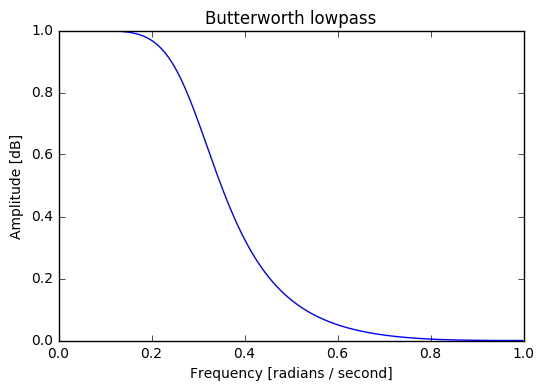

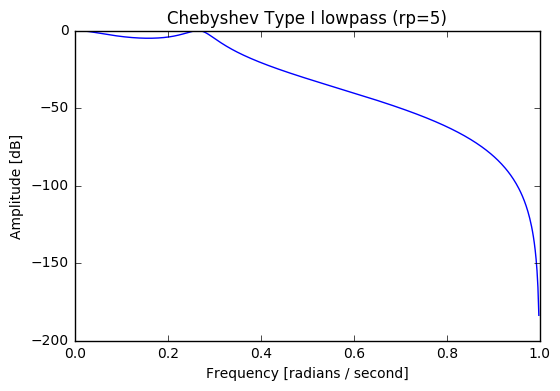

G:\Program Files\ANACONDA\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log10


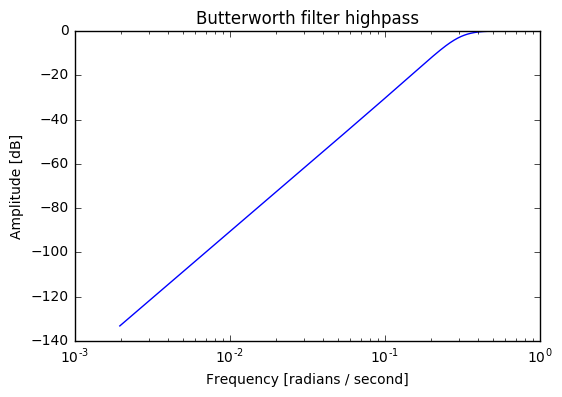

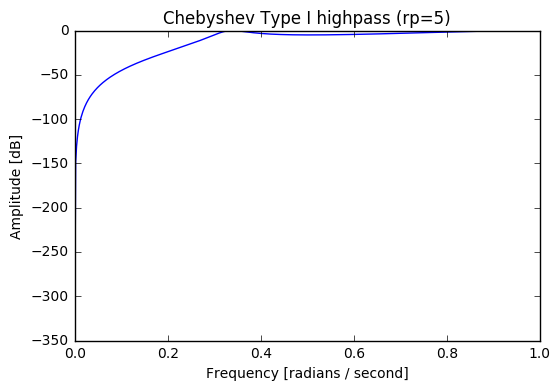

ValueError: Wn must specify start and stop frequencies

In [2]:
b, a = signal.butter(3, 0.3, 'low')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, np.abs(h))
plt.title('Butterworth lowpass')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

b, a = signal.cheby1(3, 5, 0.3, 'low')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I lowpass (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

b, a = signal.butter(3, 0.3, 'highpass')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter highpass')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

b, a = signal.cheby1(3, 5, 0.3, 'highpass')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I highpass (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

b, a = signal.butter(3, 1, 'bandpass')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Butterworth filter bandpass')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

b, a = signal.cheby1(3, 5, 1, 'bandpass')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I bandpass(rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()


**1.2**

In [ ]:
b, a = signal.cheby1(3, 1, 0.6, 'low')
w1, h1 = signal.freqz(b, a)

b, a = signal.cheby1(5, 1, 0.6, 'low')
w2, h2 = signal.freqz(b, a)

b, a = signal.cheby1(10, 1, 0.6, 'low')
w3, h3 = signal.freqz(b, a)

b, a = signal.cheby1(20, 1, 0.6, 'low')
w4, h4 = signal.freqz(b, a)

f, axarr = plt.subplots(2, 2)
axarr[0,0].plot(w1/np.pi, abs(h1))
axarr[0,0].set_title('The 3rd order')
axarr[0,1].plot(w2/np.pi, abs(h2))
axarr[0,1].set_title('The 5rd order')
axarr[1,0].plot(w3/np.pi, abs(h3))
axarr[1,0].set_title('The 10rd order')
axarr[1,1].plot(w4/np.pi, abs(h4))
axarr[1,1].set_title('The 20rd order')
plt.tight_layout()

## Recursive filter 

**2.1**

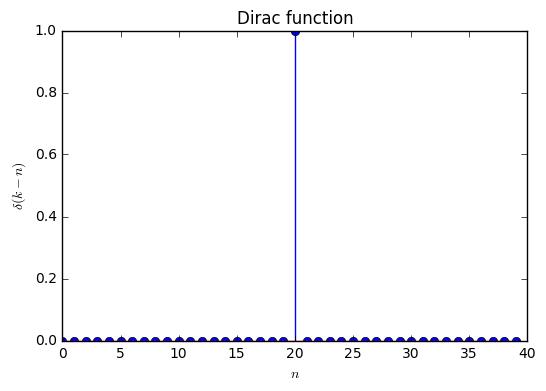

In [3]:
def dirac(n, N):
    if n > N - 1:
        raise ValueError('n should be interior to N-1')
    
    s = np.zeros((N,1))
    s[n] = 1
    return s


plt.stem(dirac(20,40))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')

**2.2**

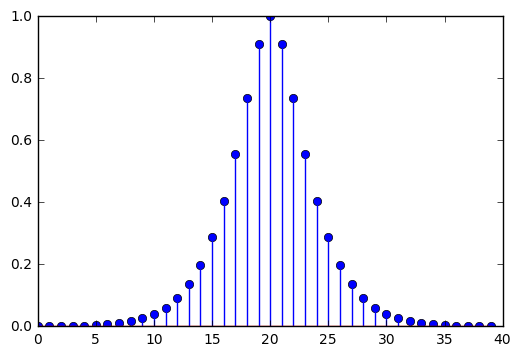

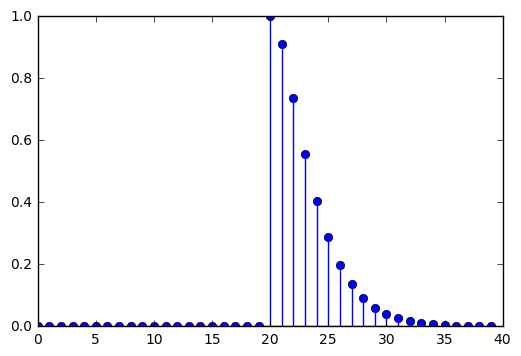

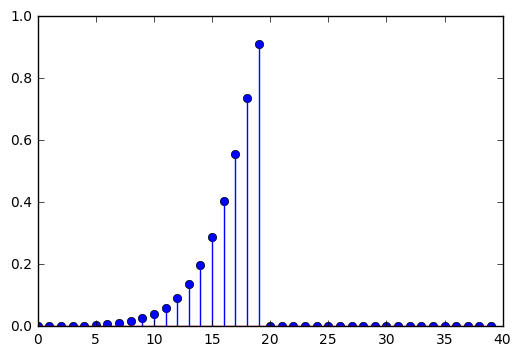

In [4]:
def smoonthC(x,s):
    N = len(x)
    T = 1
    alpha = s*T
    a = np.exp(-alpha)
    yn = np.zeros((N,))
    
    K = np.arange(2,N,1)
    yn[0] = 0
    yn[1] = 0
    for k in K:
        yn[k] = x[k] + a*(alpha -1)*x[k-1] + 2*a*yn[k-1] - a**2*yn[k-2]
    return yn

def smoonthN(x,s):
    N = len(x)
    T = 1
    alpha = s*T
    a = np.exp(-alpha)
    yn = np.zeros((N,))
    yn[N-2:N] = 0
    
    K = np.arange(N-3,-1,-1)
    for k in K:
        yn[k] = a*(alpha+1)*x[k+1] - a**2*x[k+2] + 2*a*yn[k+1] - a**2*yn[k+2]
    return yn
    
yn = smoonthC(dirac(20,40),0.5)+ smoonthN(dirac(20,40),0.5)


plt.stem(yn)
plt.show()
plt.stem(smoonthC(dirac(20,40),0.5))
plt.show()
plt.stem(smoonthN(dirac(20,40),0.5))
plt.show()
    



**2.3**

In [5]:
def H(k, N):
    
    s = np.zeros((N,1))
    for n in range(k,N):
        s[n]=1
    return s

step = H(10,40) - H(30,40)

def derivativeC(x,s):
    N = len(x)
    T = 1
    alpha = s*T
    a = np.exp(-alpha)
    yn = np.zeros((N,))
    
    K = np.arange(2,N,1)
    yn[0] = 0
    yn[1] = 0
    for k in K:
        yn[k] = -s*alpha*a*x[k-1] + 2*a*yn[k-1] - a**2*yn[k-2]
    return yn

def derivativeN(x,s):
    N = len(x)
    T = 1
    alpha = s*T
    a = np.exp(-alpha)
    yn = np.zeros((N,))
    yn[N-2:N] = 0
    
    K = np.arange(N-3,-1,-1)
    for k in K:
        yn[k] = s*alpha*a*x[k+1] + 2*a*yn[k+1] - a**2*yn[k+2]
    return yn

**2.4**

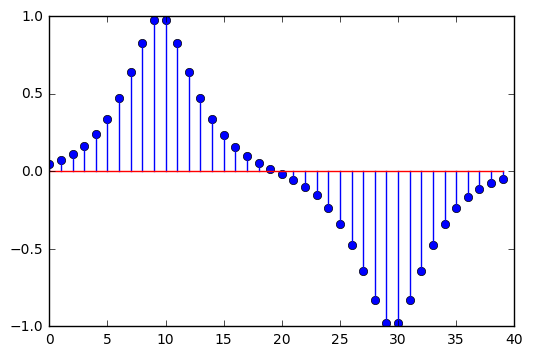

<function show at 0x0000028E4DAE9A60>

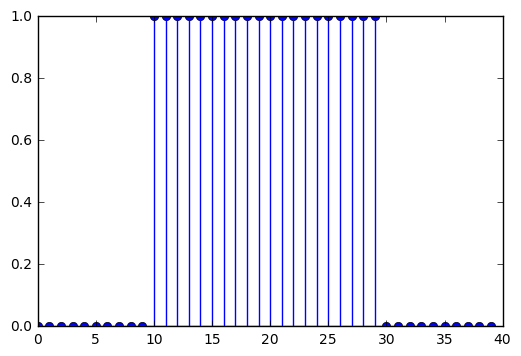

In [6]:
yn = derivativeC(step,0.5)+ derivativeN(step,0.5)


plt.stem(yn)
plt.show()
#plt.stem(smoonthC(step,0.5))
#plt.show()
#plt.stem(smoonthN(step,0.5))
#plt.show()
plt.stem(step)
plt.show

**3.1**

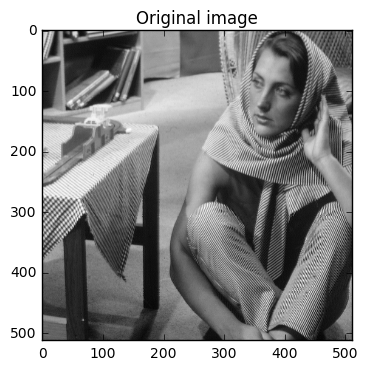

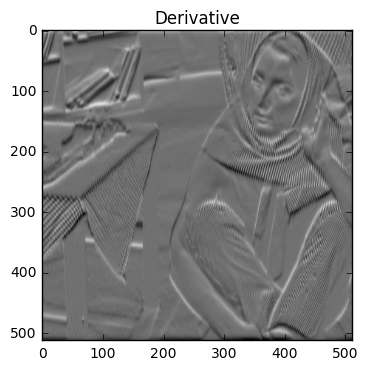

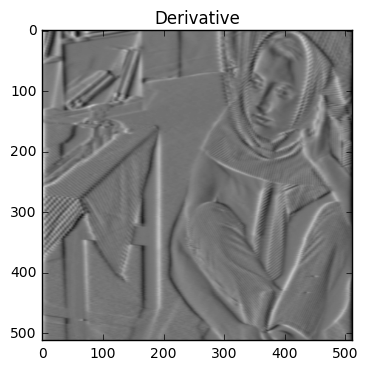

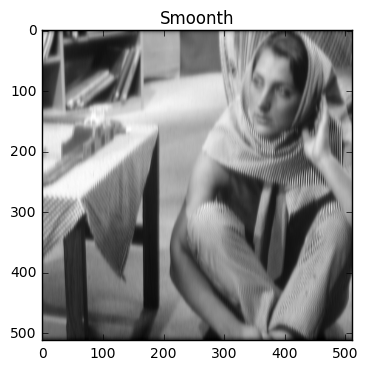

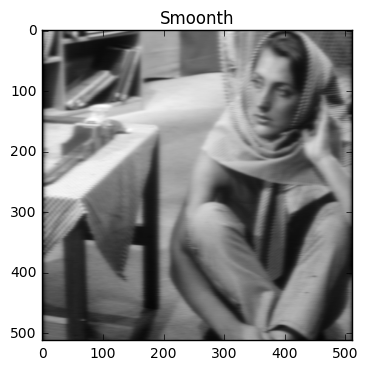

In [7]:
Path = '../images/'
image_name = 'barbara.gif'
bar_im = io.imread(Path.__add__(image_name))
bar_im = img_as_float(bar_im)

plt.figure
plt.imshow(bar_im, cmap='gray')
plt.title('Original image')
plt.show()

bar_im = np.array(bar_im)
row,col = np.shape(bar_im)

bar_filter = np.zeros((row,col))

for i in range(0,col):
    bar_filter[:,i] = derivativeC(bar_im[:,i],0.5)+ derivativeN(bar_im[:,i],0.5)
    
plt.figure
plt.imshow(bar_filter, cmap='gray')
plt.title('Derivative')
plt.show()

bar_filter = np.zeros((row,col))

for i in range(0,row):
    bar_filter[i,:] = derivativeC(bar_im[i,:],0.5)+ derivativeN(bar_im[i,:],0.5)
    
plt.figure
plt.imshow(bar_filter, cmap='gray')
plt.title('Derivative')
plt.show()



**3.2** , **3.3**

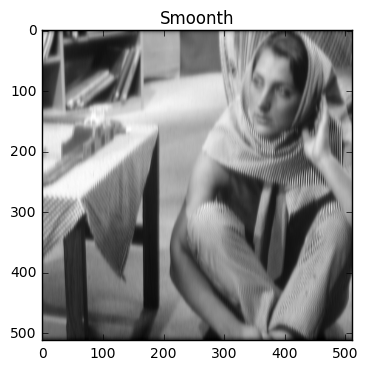

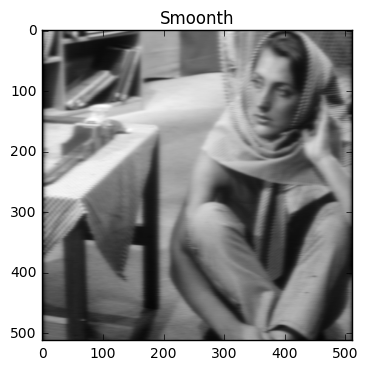

In [10]:
bar_filter = np.zeros((row,col))

for i in range(0,col):
    bar_filter[:,i] = smoonthC(bar_im[:,i],0.5)+ smoonthN(bar_im[:,i],0.5)
    
plt.figure
plt.imshow(bar_filter, cmap='gray')
plt.title('Smoonth')
plt.show()

bar_filter = np.zeros((row,col))

for i in range(0,row):
    bar_filter[i,:] = smoonthC(bar_im[i,:],0.5)+ smoonthN(bar_im[i,:],0.5)
    
plt.figure
plt.imshow(bar_filter, cmap='gray')
plt.title('Smoonth')
plt.show()






**3.4**

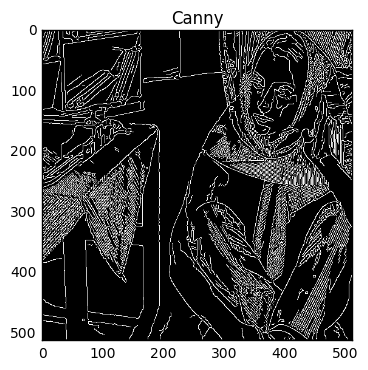

In [11]:
from skimage import feature

edges = np.zeros((row,col))
edges = feature.canny(bar_im)
plt.figure
plt.imshow(edges, cmap='gray')
plt.title('Canny')
plt.show()